# Aprendizaje Supervisado
#### Cristobal Donoso
##### 26 Junio de 2021

<center><img src="./figures/pipeline.png" width=1920 height=1080><center>


<center><img src="./figures/pipeline2.png" width=1920 height=1080><center>


<center><img src="./figures/pipeline3.png" width=1920 height=1080><center>


# Identificar los datos necesarios

- Conocimiento Experto: Caracteristicas o atributos
- Simulaciones -> [(series de tiempo)](https://github.com/TimeSynth/TimeSynth)
- WebScrapping -> [(tutorial aqui)](https://github.com/cridonoso/IntroToDataScience/blob/master/3-WebScraping/webScraping.ipynb)
- Fuerza Bruta - _no recomendado (Zhang et al., 2002)_

# Preprocesamiento
## Datos faltantes o Missing values

<center><img src="./figures/missingtypes.png" width=1920 height=1080><center>

<i><p style='{ font-family: Arial; font-size: 20px;}'>
Little, R. J. A., & Rubin, D. R. (1987).Statistical analysis with missing data. New York: John Wiley & Sons.
</p></i>

# Ejercicios
## 1. Identifique el tipo de Valor Faltante 


>Se extrae una muestra aleatoria desde una poblacion de personas (todos con igual probabilidad de ser elegidos). Debido a que seleccionamos un subconjunto de la poblacion parte de la informacion no sera observada.



# Ejercicios
## 2. Identifique el tipo de Valor Faltante 


> El procentaje de aprobacion de cierta autoridad, desarrollada por el grupo de amigos de la autoridad, resultaron  positivos pese a las numerosas protestas que incluyen al 90% de la poblacion.


# Ejercicios
## 3. Identifique el tipo de Valor Faltante 


> Quien trasladaba las muestras de PCR aplicados a un grupo de ancianos en la comuna de Loncoche tropieza con un gato que perseguia a un grillo. Dos muestras se pierden despues del accidente.



# Ejercicios
## 4. Identifique el tipo de Valor Faltante 


> Cierta persona no se presento a dar el examen de conducir puesto que contrajo COVID-19.



# Como lidiar con valores faltantes





### Generando datos

In [4]:
import pandas as pd 
import numpy as np

N = 1000
id_person = np.arange(N)
edades = np.random.randint(5, 80, N)
pesos = np.round(np.random.uniform(30, 120, N), 1)
estaturas = np.round(np.random.uniform(1, 2, N), 1)
mcis = pesos/np.power(estaturas, 2)

In [5]:
def insert_nan(lista, n=2):
    lista = lista.astype(object)
    lista[np.random.randint(0, len(lista), n)] = np.nan
    return lista

In [6]:
df = pd.DataFrame()
df['id'] = id_person
df['edad'] = insert_nan(edades, 10)
df['peso'] = insert_nan(pesos, 10)
df['estaturas'] = insert_nan(estaturas, 10)
df['mci'] = insert_nan(mcis, 10)
df.sample(5)

,id,edad,peso,estaturas,mci
299,299,28,109.3,1.3,64.674556
281,281,38,94.5,1.6,36.914062
924,924,65,50.8,1.8,15.679012
87,87,75,71.2,1.3,42.130178
146,146,55,90.0,2.0,22.5


# Metodos para tratar con valores Faltantes
1. **Ignorar o Descartar los datos**

In [19]:
df[df['peso'].isnull()]

,id,edad,peso,estaturas,mci,Class,Label
3,3,17,NaN,1.3,47.100592,True,1
23,23,76,NaN,1.0,80.5,True,1
181,181,15,NaN,1.0,48.4,True,1
252,252,44,NaN,1.5,49.822222,True,1
353,353,22,NaN,1.1,97.933884,True,1
393,393,77,NaN,1.7,31.314879,True,1
448,448,55,NaN,1.3,47.514793,True,1
786,786,14,NaN,1.9,24.570637,False,0
787,787,52,NaN,1.4,41.377551,True,1
906,906,31,NaN,1.2,50.416667,True,1


# Metodos para tratar con valores Faltantes
1. Ignorar o Descartar los datos
2. **Estimacion de parametros**

<i><p style='{ font-family: Arial; font-size: 20px;}'>
Fuente: Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied artificial intelligence, 17(5-6), 519-533.
</p></i>

# Metodos para tratar con valores Faltantes
1. Ignorar o Descartar los datos
2. Estimacion de parametros
3. **Imputación**
    - Susticion: Por ejemplo reemplazar una persona que no puede ser contactada por otra que si haya dado su numero de contacto
    - Media o Moda
    - Hot Deck y Cold Deck: Particionar los datos en clusters. Luego cada instancia con valores faltantes es asignada a algun cluster. Finalmente, se reemplaza con la media o moda.
    - Modelo predictivo: Consiste en ajustar un modelo predictivo para estimar valores faltantes.
    
<i><p style='{ font-family: Arial; font-size: 20px;}'>
Fuente: Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied artificial intelligence, 17(5-6), 519-533.
</p></i>

In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
r = imputer.fit_transform(df)
df2 = pd.DataFrame(r)
df2.columns = df.columns
df2

,id,edad,peso,estaturas,mci
0,0.0,27.0,99.40,1.9,27.534626
1,1.0,58.0,54.90,1.3,32.485207
2,2.0,44.0,61.70,1.9,17.091413
3,3.0,17.0,68.75,1.3,47.100592
4,4.0,56.0,51.90,1.6,20.273437
...,...,...,...,...,...
995,995.0,8.0,44.90,1.2,31.180556
996,996.0,56.0,39.00,1.3,23.076923
997,997.0,26.0,65.10,1.3,38.520710
998,998.0,55.0,67.80,1.2,47.083333


https://scikit-learn.org/stable/modules/impute.html

# Preprocesamiento 

### Formatear las etiquetas

In [9]:
df['Class'] = df['mci'] > 30
df.head()

,id,edad,peso,estaturas,mci,Class
0,0,27,99.4,1.9,27.534626,False
1,1,NaN,54.9,1.3,32.485207,True
2,2,44,61.7,1.9,17.091413,False
3,3,17,NaN,1.3,47.100592,True
4,4,56,51.9,1.6,20.273437,False


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Class'])
df['Label'] = labels

## One-hot encoding

In [11]:
onehot = pd.get_dummies(df['Label'])
onehot.columns = ['Normal', 'Sobrepeso']
df_nuevo = pd.concat([df, onehot], 1)
df_nuevo.head(3)

,id,edad,peso,estaturas,mci,Class,Label,Normal,Sobrepeso
0,0,27,99.4,1.9,27.534626,False,0,1,0
1,1,NaN,54.9,1.3,32.485207,True,1,0,1
2,2,44,61.7,1.9,17.091413,False,0,1,0


# Normalizacion de datos

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normed = scaler.fit_transform(df2.iloc[:, 1:5])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = scaler.fit_transform(df2.iloc[:, 1:5])

<center><img src="./figures/pipeline3.png" width=1920 height=1080><center>


# Separar conjunto de entrenamiento

> Por que debemos dividir nuestro conjunto de entrenamiento?

- **Train**: Ajustar Parametros
- **Validacion**: Evaluar que tan bien generaliza el modelo durante el entrenamiento. Tambien nos permite definir criterios de convergencia en algoritmos de optimizacion iterativos.
- **Test**: Evaluacion final de nuestro modelo sobre un conjunto de datos nunca antes observado

In [15]:
from sklearn.model_selection import train_test_split

X = df_standard
y = df['Label'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 4) (670,)
(330, 4) (330,)


# Seleccion de Algoritmo

<center><img src="./figures/tabla_algoritmos.png" width=1200 height=700><center>

<i><p style='{ font-family: Arial; font-size: 12px;}'>
Fuente: Kotsiantis, S. B., Zaharakis, I., & Pintelas, P. (2007). Supervised machine learning: A review of classification techniques. Emerging artificial intelligence applications in computer engineering, 160(1), 3-24.
</p></i>

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

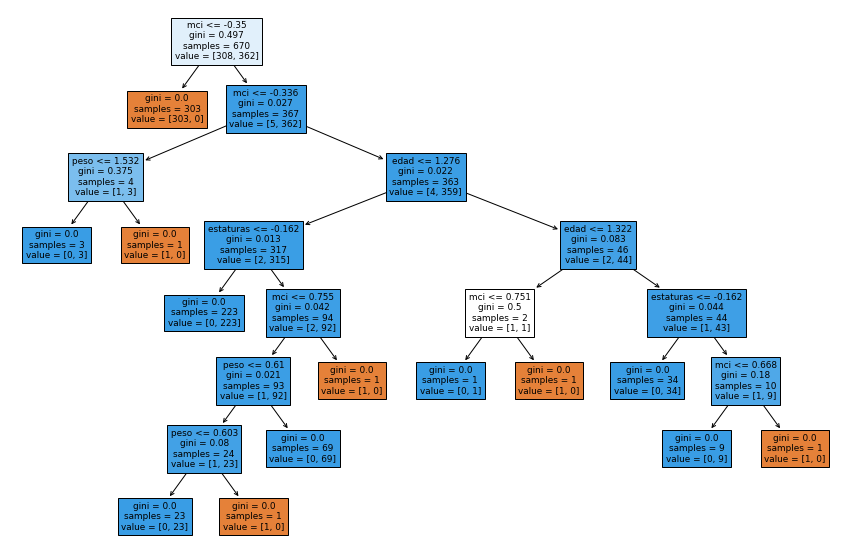

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=df2.iloc[:, 1:5].columns,  
                   filled=True)

### Metricas de evaluacion

In [25]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9787878787878788

In [26]:
from sklearn.metrics import precision_recall_fscore_support
prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('precision: {} recall: {} F1: {}'.format(prec, recall, f1))

precision: 0.9780844155844156 recall: 0.9794110029967813 F1: 0.9786654352343569


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [30]:
import seaborn as sns


def plot_cm(cm, ax, title='CM', cmap='Blues', fontsize=15, cbar=False, yticklabels=True, class_names=None):
    '''
    Plot Confusion Matrix
    '''
    labels = np.zeros_like(cm, dtype=np.object)
    mask = np.ones_like(cm, dtype=np.bool)
    for (row, col), value in np.ndenumerate(cm):
        if value != 0.0:
            mask[row][col] = False
        if value < 0.01:
            labels[row][col] = '< 1%'
        else:
            labels[row][col] = '{:2.1f}%'.format(value*100)

    ax = sns.heatmap(cm, annot = cm, fmt = '2.2f',
                     annot_kws={"size": fontsize},
                     cbar=cbar,
                     ax=ax,
                     linecolor='white',
                     linewidths=1,
                     vmin=0, vmax=1,
                     cmap=cmap,
                     mask=mask,
                     yticklabels=yticklabels)

    if yticklabels and class_names is not None:
        ax.set_yticklabels(class_names, rotation=0, fontsize=fontsize+1)

    ax.set_title(title, fontsize=fontsize+2)

    ax.axhline(y=0, color='k',linewidth=4)
    ax.axhline(y=cm.shape[1], color='k',linewidth=4)
    ax.axvline(x=0, color='k',linewidth=4)
    ax.axvline(x=cm.shape[0], color='k',linewidth=4)

    return ax

<AxesSubplot:title={'center':'CM'}>

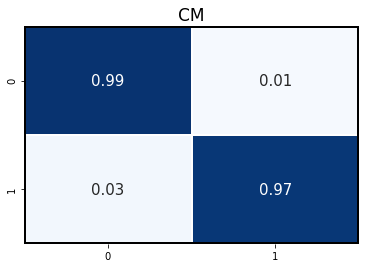

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1,1)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plot_cm(cm, ax)

# Busqueda de  Hiperparametros

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

In [76]:
parameters = {'kernel':('linear', 'rbf')}
clf = GridSearchCV(svc, parameters)
clf = clf.fit(X_train, y_train)

In [77]:
for k, m1, m2 in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']):
    print('{} - {:.2f} +- {:.2f}'.format(k['kernel'], m1, m2))

linear - 0.95 +- 0.02
rbf - 0.95 +- 0.02


# Cross Validation

La Validacion Cruzada (o cross-validation) es una tecnica de testing en aprendizaje automatico, la cual nos permite evaluar (estadisticamente) la capacidad de generalizacion de nuestros modelos.

<center><img src="./figures/xval.png" width=1280 height=720><center>

<i><p style='{ font-family: Arial; font-size: 12px;}'>
https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.svg
</p></i>

https://scikit-learn.org/stable/modules/cross_validation.html

In [81]:
from sklearn.model_selection import KFold

# Data
X = df_standard
y = df['Label'].values

kf = KFold(n_splits=2)
for train, test in kf.split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    print(X_train.shape)
    # Entrenar el modelo
    # ----
    # Evaluar el modelo
    # ----
    # Guardar metricas

(500, 4)
(500, 4)


# Recursos Extra

https://github.com/cridonoso/IntroToDataScience/tree/master/5-Classification